In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline
%run function.ipynb

df = pd.read_csv('clean6.csv')
df_copy = df.copy()
print(df_copy.shape)
df_copy.head(3)

(894207, 48)


LoanNr_ChkDgt                         Name         City State    Zip  \
0     1000014003               ABC HOBBYCRAFT   EVANSVILLE    IN  47711   
1     1000024006  LANDMARK BAR & GRILLE (THE)    NEW PARIS    IN  46526   
2     1000034009        WHITLOCK DDS, TODD M.  BLOOMINGTON    IN  47401   

                      Bank BankState ApprovalDate   Term  NoEmp  ...  \
0         FIFTH THIRD BANK        OH   1997-02-28   84.0    4.0  ...   
1          1ST SOURCE BANK        IN   1997-02-28   60.0    2.0  ...   
2  GRANT COUNTY STATE BANK        IN   1997-02-28  180.0    7.0  ...   

   OccupiedHousingUnits  MedianHomeValue  MedianHouseholdIncome  \
0               12895.0         115600.0                48618.0   
1               10938.0         120200.0                47863.0   
2               17562.0         207900.0                45415.0   

   DisbursePerEmployee  GrSBA_AppvDiff%  State_division  USDPerJobCreated  \
0         12000.000000             20.0        Mid-West               NaN   
1         13333.333333             20.0        Mid-West               NaN   
2         35875.000000             25.0        Mid-West               NaN   

  loan_marturity_date Is_Cross_State  Appv_Dusburse_delta  
0          2004-02-28              1                730.0  
1          2002-02-28              0                 92.0  
2          2012-02-28              0                306.0  

[3 rows x 48 columns]

In [2]:
obj_features = ['State', 'BankState', 'NewExist', 'IsFranchised', 'UrbanRural', 'RevLineCr', 'LowDoc', 'Industry',
            'ApprovalDate_year', 'ApprovalDate_month', 'DisbursementDate_year', 'DisbursementDate_month', 'State_division']
num_features = ['Default', 'ChgOffPrinGr', 'Term', 'DisbursementGross', 'GrSBA_AppvDiff%', 'DisbursePerEmployee',
                'USDPerJobCreated','NoEmp', 'CreateJob', 'RetainedJob', 'Population', 'PopDensity', 'GrAppv', 'SBA_Appv',
                'HousingUnits', 'OccupiedHousingUnits', 'MedianHomeValue', 'MedianHouseholdIncome']
time_cols = ['ApprovalDate_year', 'ApprovalDate_month', 'DisbursementDate_year', 'DisbursementDate_month']

df_groupby_mean = dict()
df_groupby_size = dict()
df_groupby_sum = dict()

for col in obj_features:
    df_groupby_mean[col] = df_copy.groupby(by=col).mean()[num_features]
    df_groupby_sum[col] = df_copy.groupby(by=col).sum()[num_features]
    df_groupby_size[col] = pd.DataFrame(df_copy.groupby(by=col).size())
    df_groupby_size[col].rename(columns={0: 'size'}, inplace=True)

In [3]:
# df_groupby_mean['State'].to_csv('State_mean.csv')
# df_groupby_mean['BankState'].to_csv('BankState_mean.csv')
# df_groupby_sum['State'].to_csv('State_sum.csv')
# df_groupby_sum['BankState'].to_csv('BankState_sum.csv')

# UrbanRural Undefined

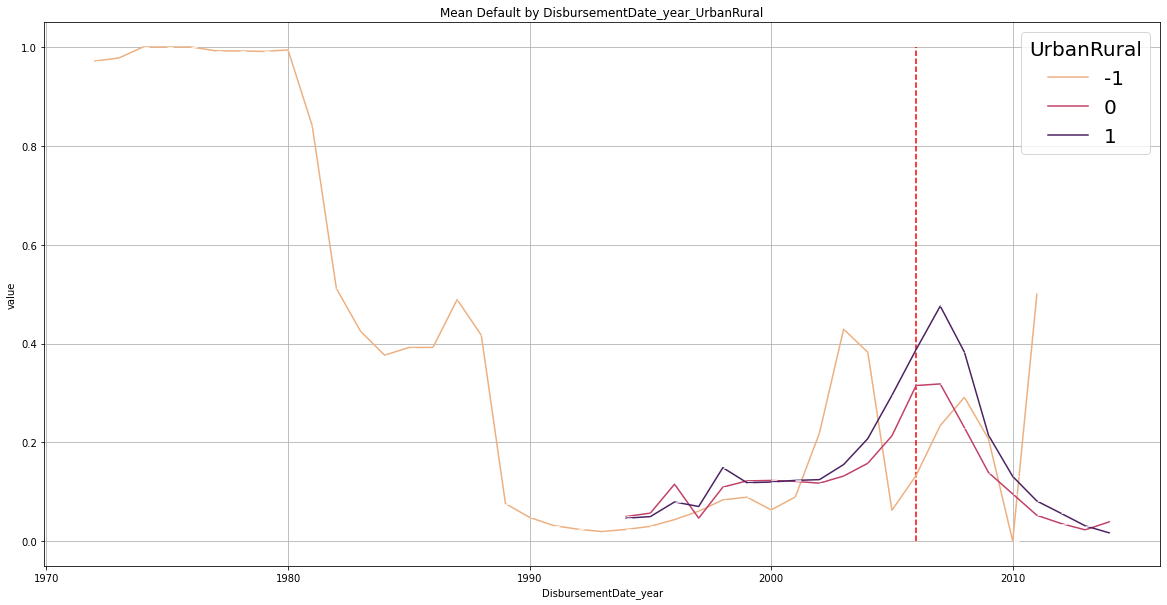

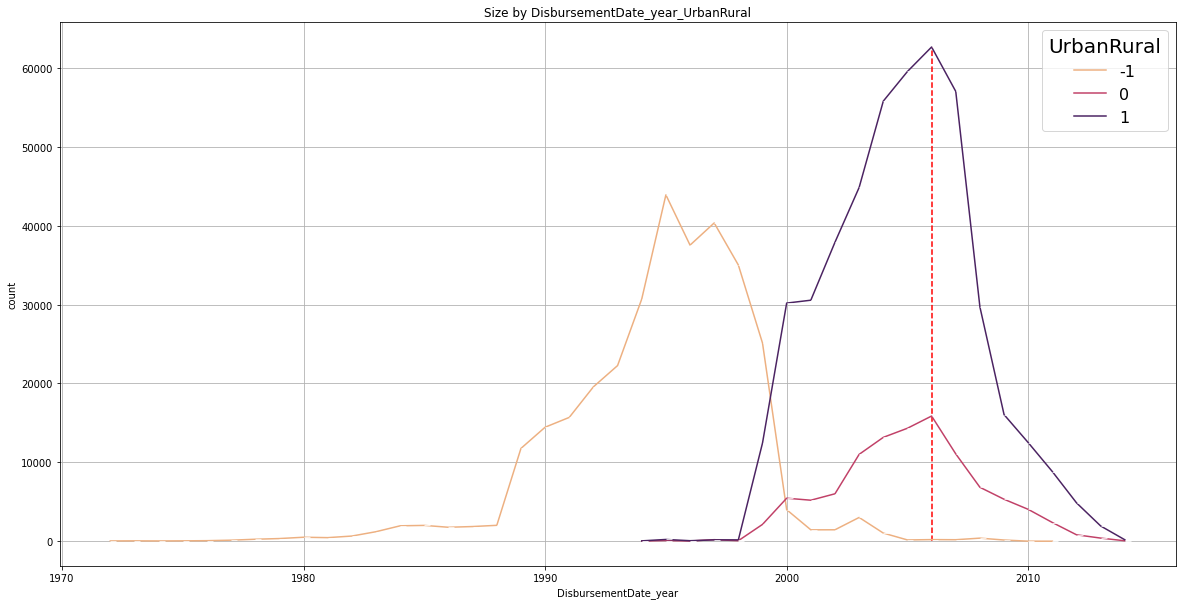

In [4]:
# UrbanRural延伸分析

data = df_copy.groupby(by=['DisbursementDate_year', 'UrbanRural']).mean()
data_long = data.melt(ignore_index=False).reset_index()
data_def = data_long[data_long['variable'] == 'Default']

data_def = data_def[data_def['DisbursementDate_year'] >= 1972]
data_def[['DisbursementDate_year', 'UrbanRural']] = data_def[['DisbursementDate_year', 'UrbanRural']].applymap(lambda x: int(x))

year_list = list(df_groupby_mean['ApprovalDate_year'][~(df_copy.groupby(by='ApprovalDate_year').size().values < 30)].index)

data = pd.DataFrame(df_copy.groupby(by=['DisbursementDate_year', 'UrbanRural']).size()).reset_index()
data.rename(columns={0: 'count'}, inplace=True)
data = data[data['DisbursementDate_year'] >= 1972]
data[['DisbursementDate_year', 'UrbanRural']] = data[['DisbursementDate_year', 'UrbanRural']].applymap(lambda x: int(x))

plt.figure(figsize=(20,10))

num = 'Default'

plt.title('Mean {} by DisbursementDate_year_UrbanRural'.format(num))
plt.grid(True)
plt.vlines(x=[2006.0], ymin=data_def['value'].min(), ymax=data_def['value'].max(), color='r', linestyles='dashed')
sns.lineplot(data=data_def, x=data_def['DisbursementDate_year'], y=data_def['value'], marker=True, hue='UrbanRural',
             palette="flare")
plt.savefig('Mean {} by DisbursementDate_year_UrbanRural.jpeg'.format(num))
plt.legend(title='UrbanRural', fontsize=20, title_fontsize=20)

plt.figure(figsize=(20,10))
plt.title('Size by DisbursementDate_year_UrbanRural'.format(num))
plt.grid(True)
plt.vlines(x=[2006.0], ymin=data['count'].min(), ymax=data['count'].max(), color='r', linestyles='dashed')
sns.lineplot(data=data, x=data['DisbursementDate_year'], y=data['count'], marker=True, hue='UrbanRural',
             palette="flare")
plt.savefig('Size by DisbursementDate_year_UrbanRural.jpeg')
plt.legend(title='UrbanRural', fontsize=16, title_fontsize=20)

plt.show()

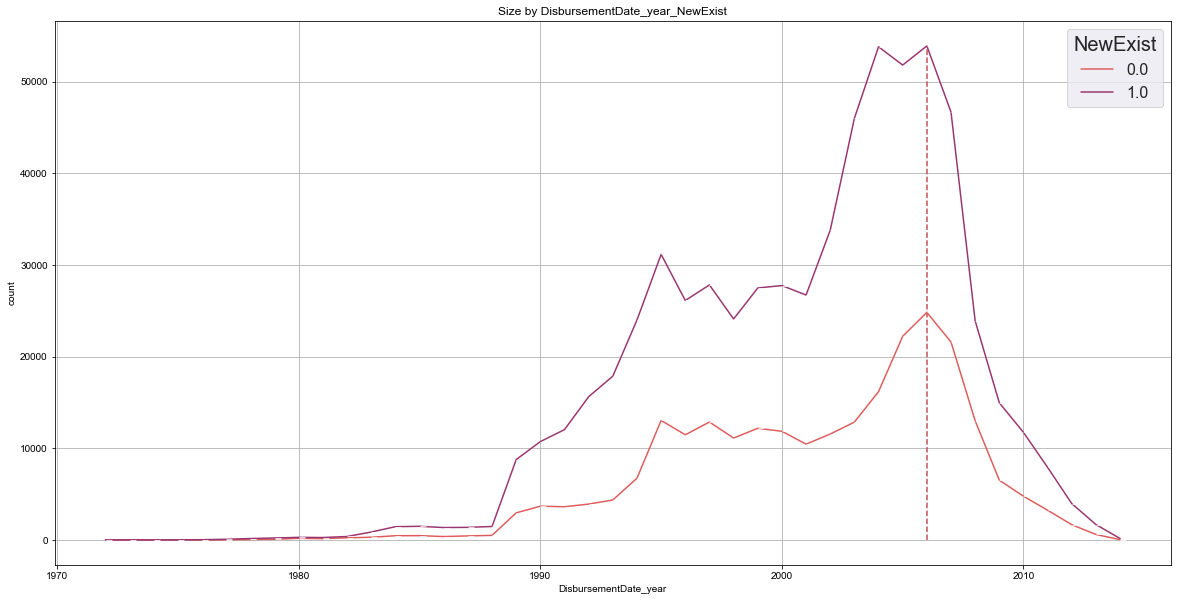

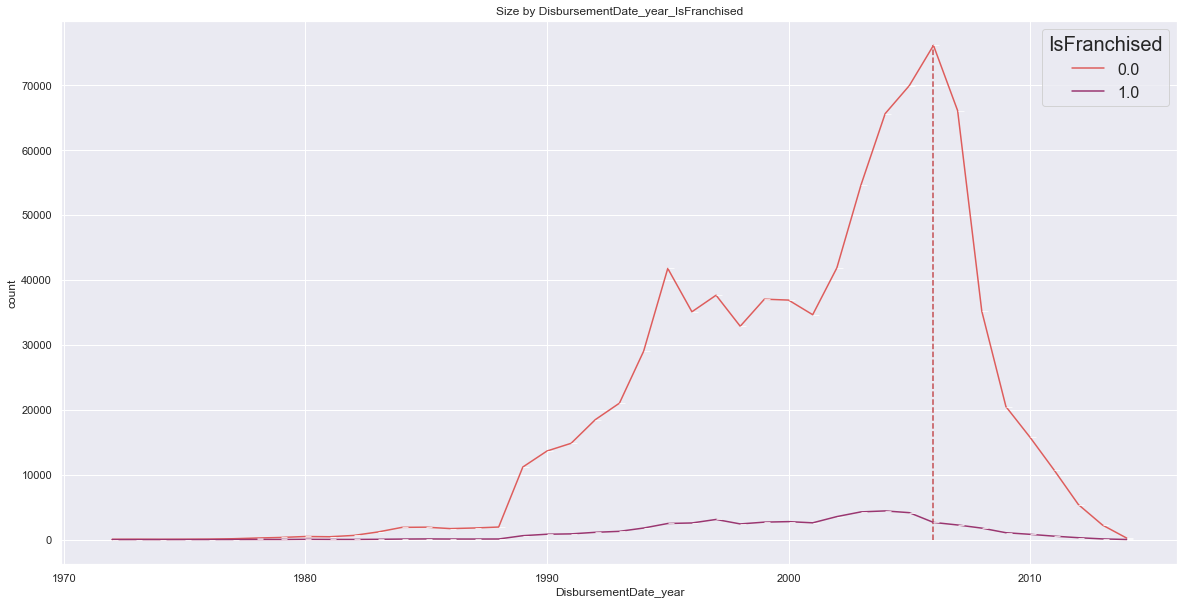

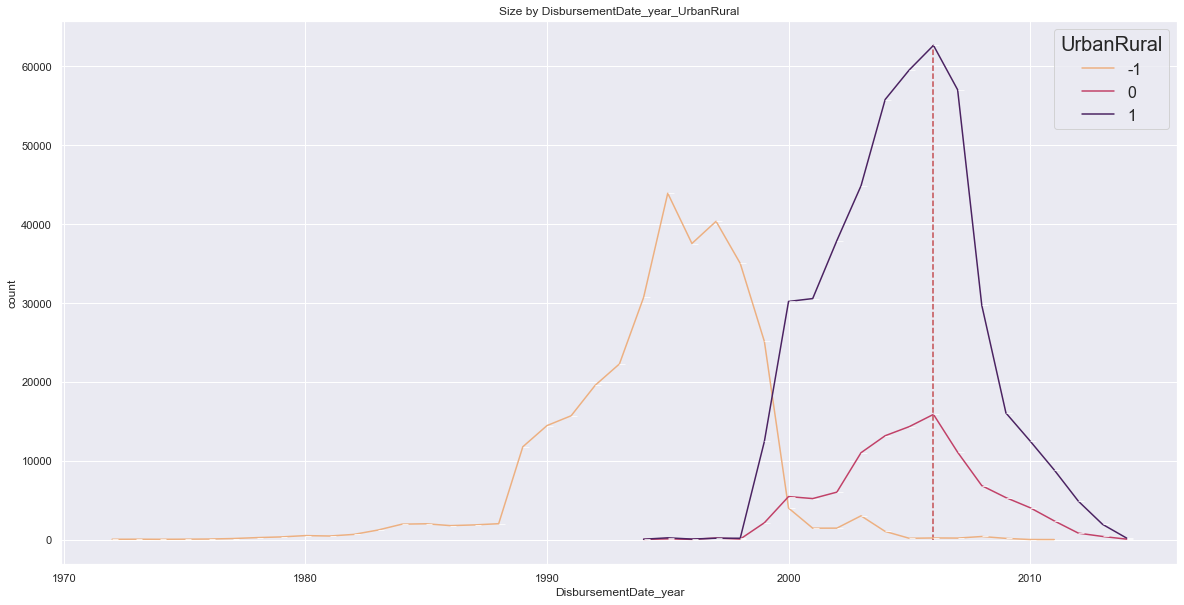

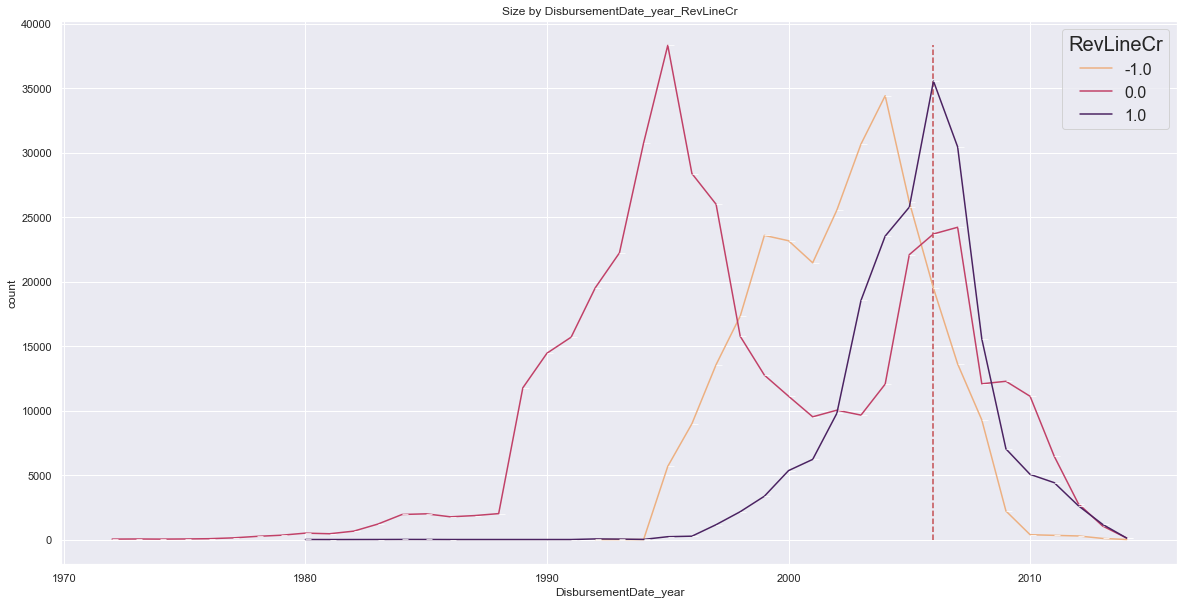

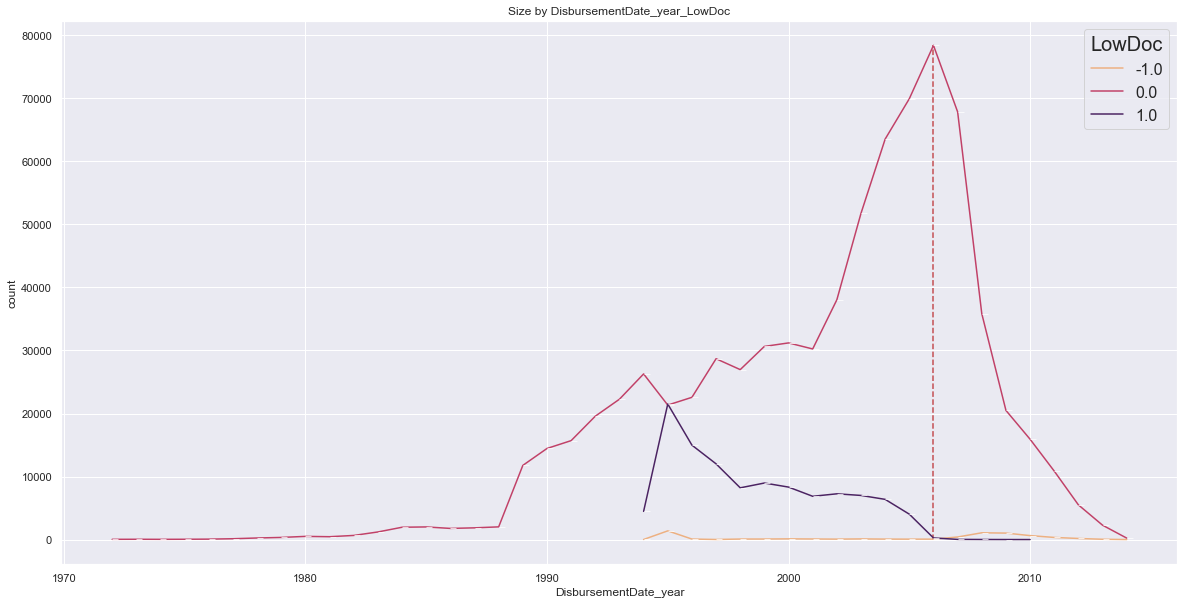

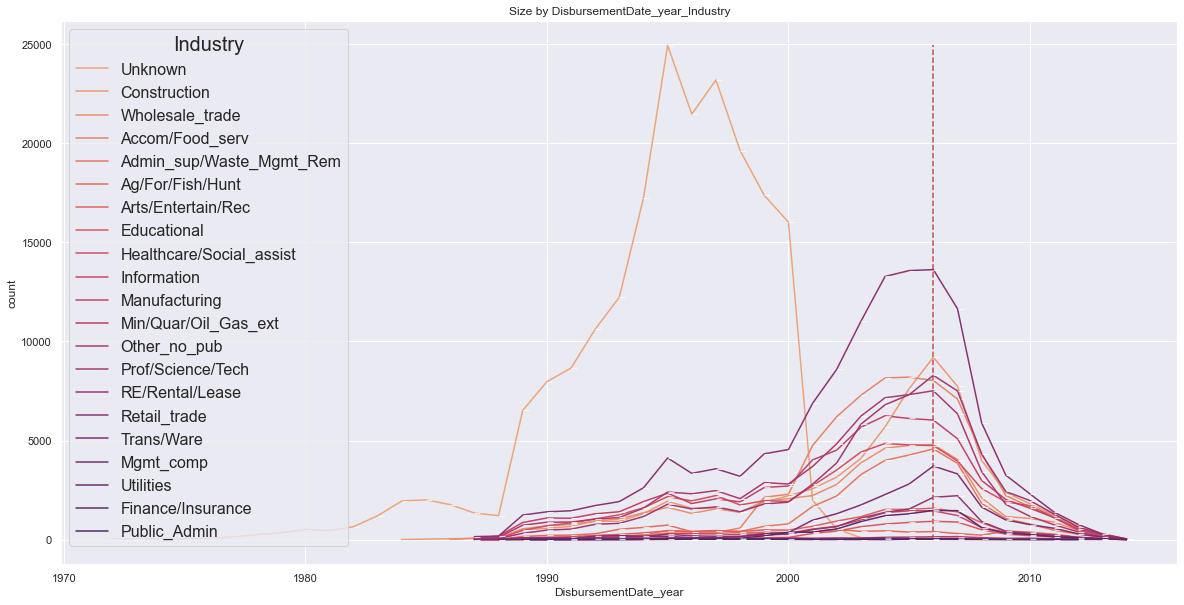

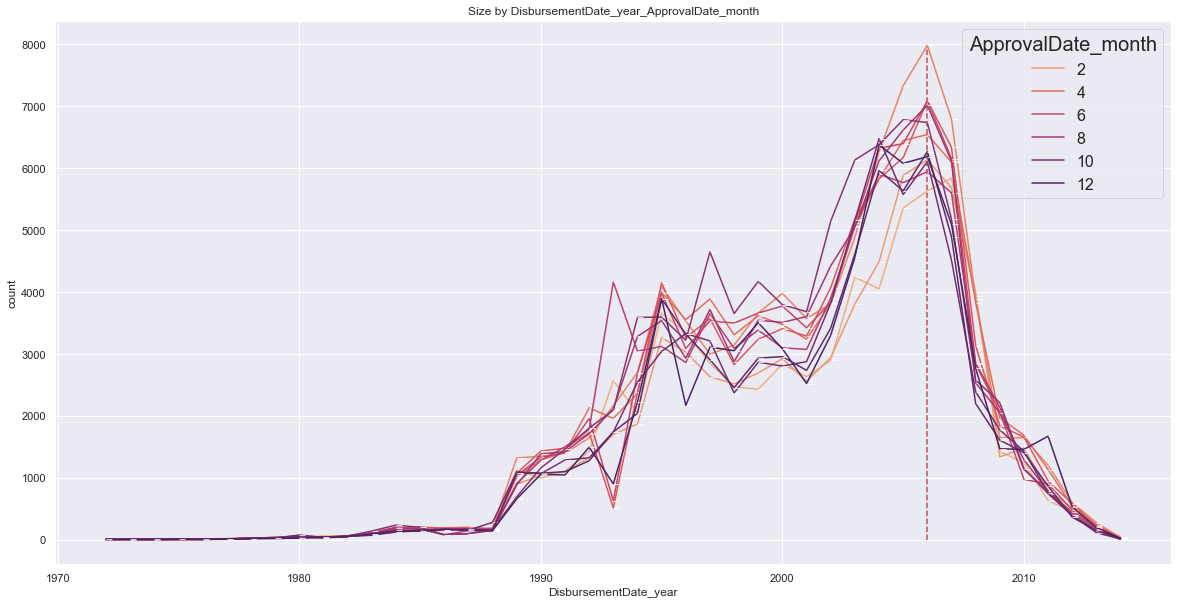

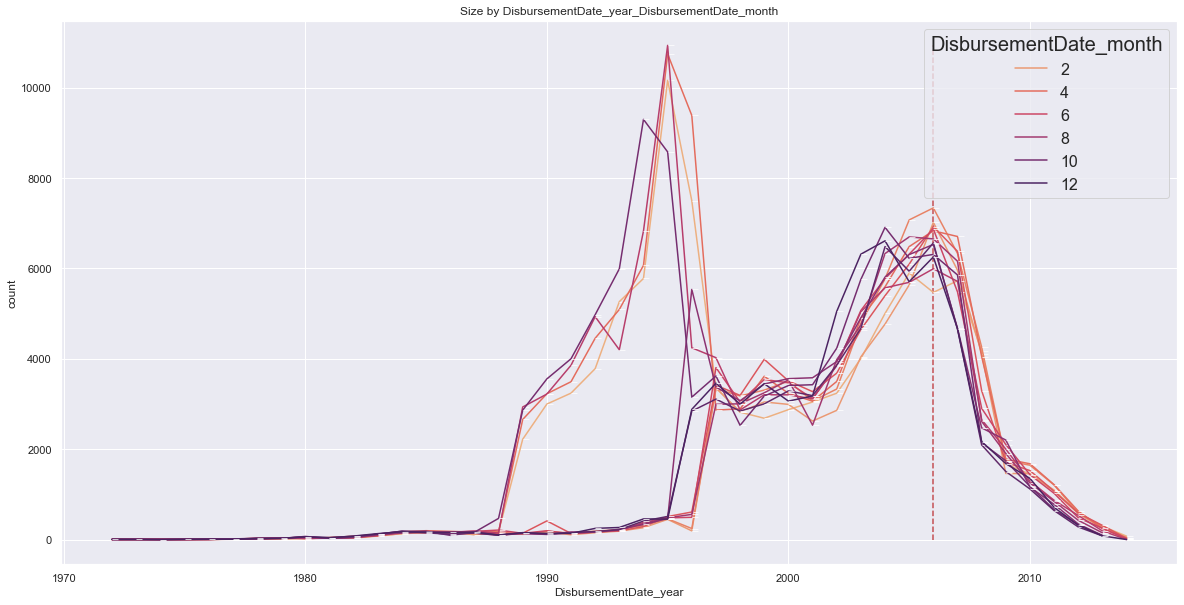

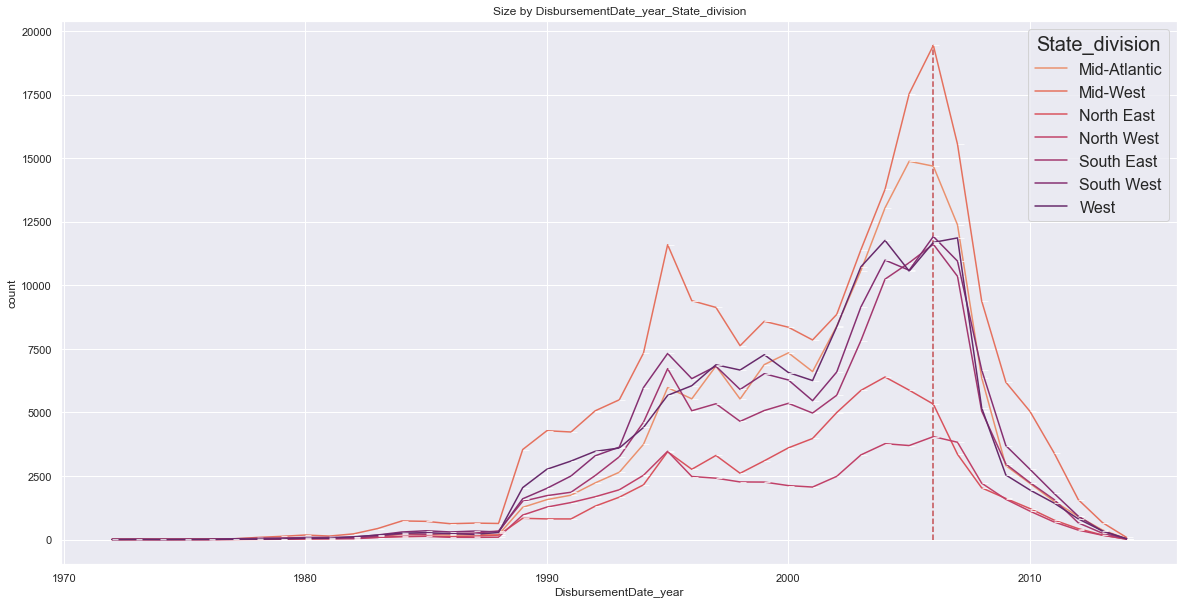

In [5]:
size_hue_disbursementyear(df_copy, hue_cols=obj_features, year_col='DisbursementDate_year')

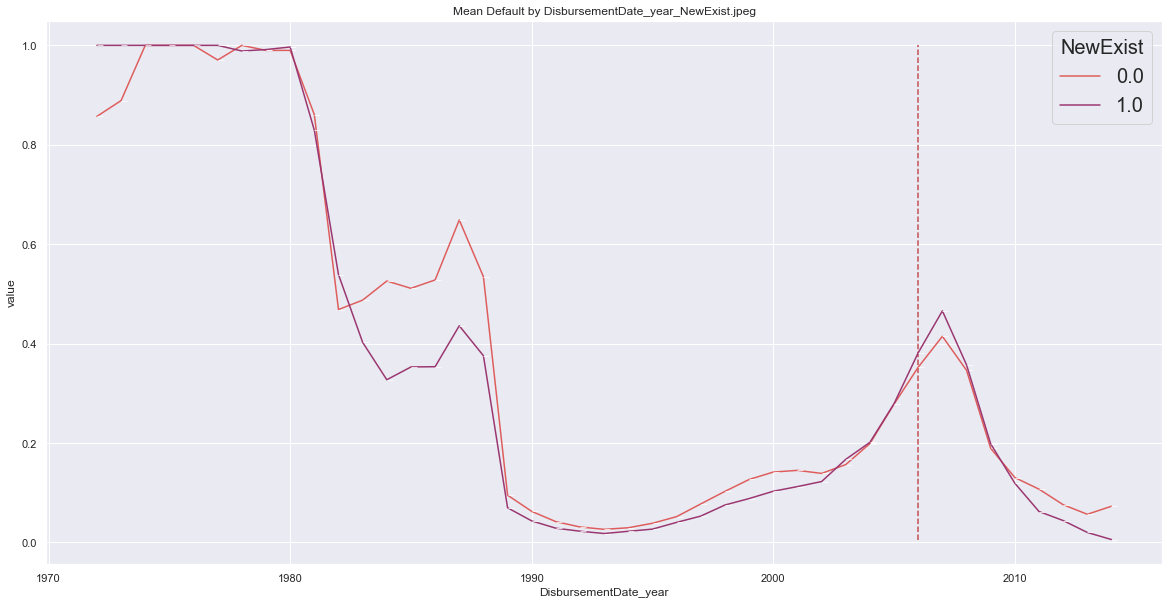

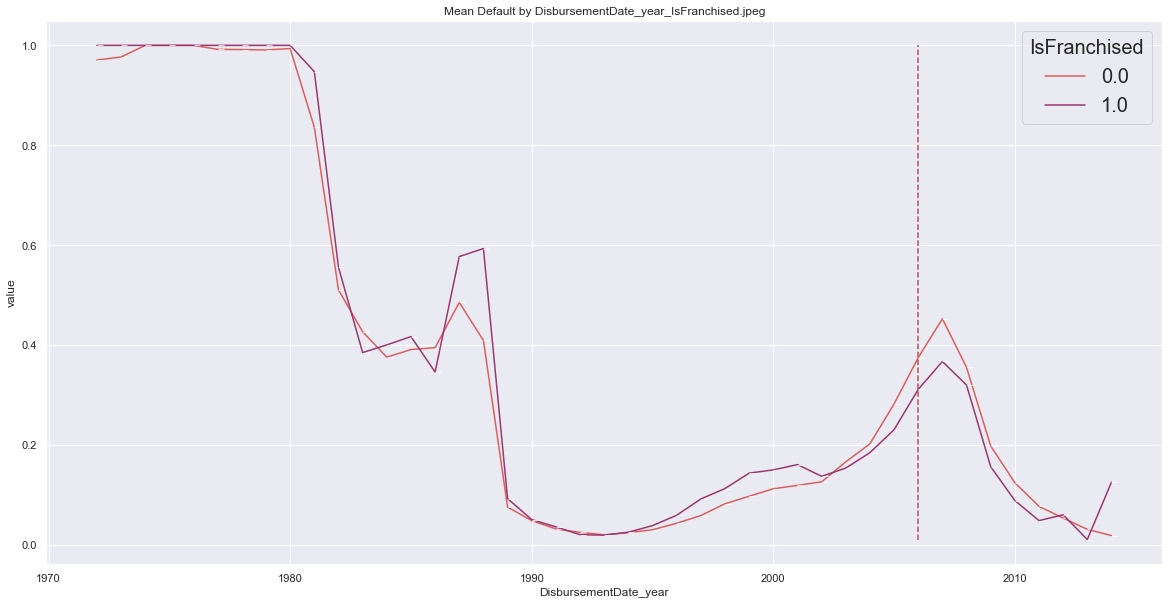

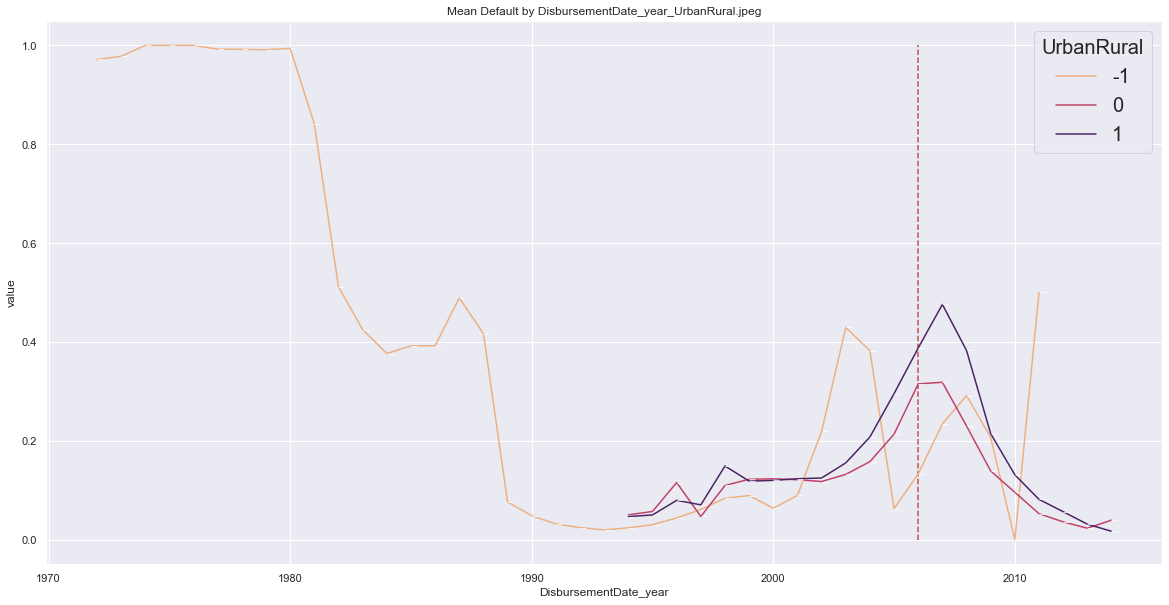

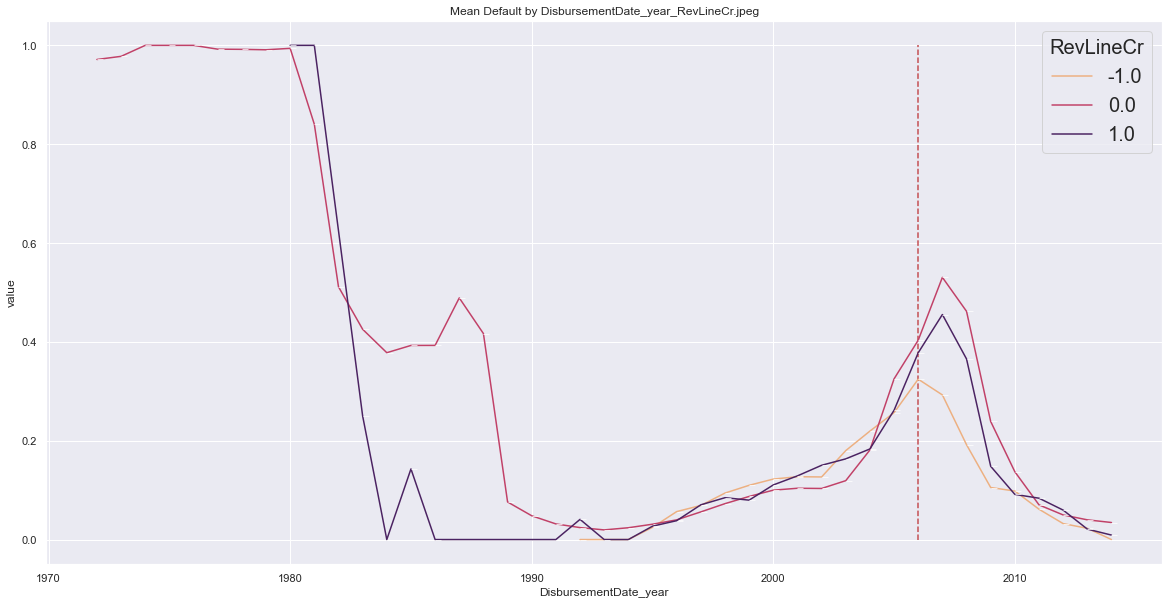

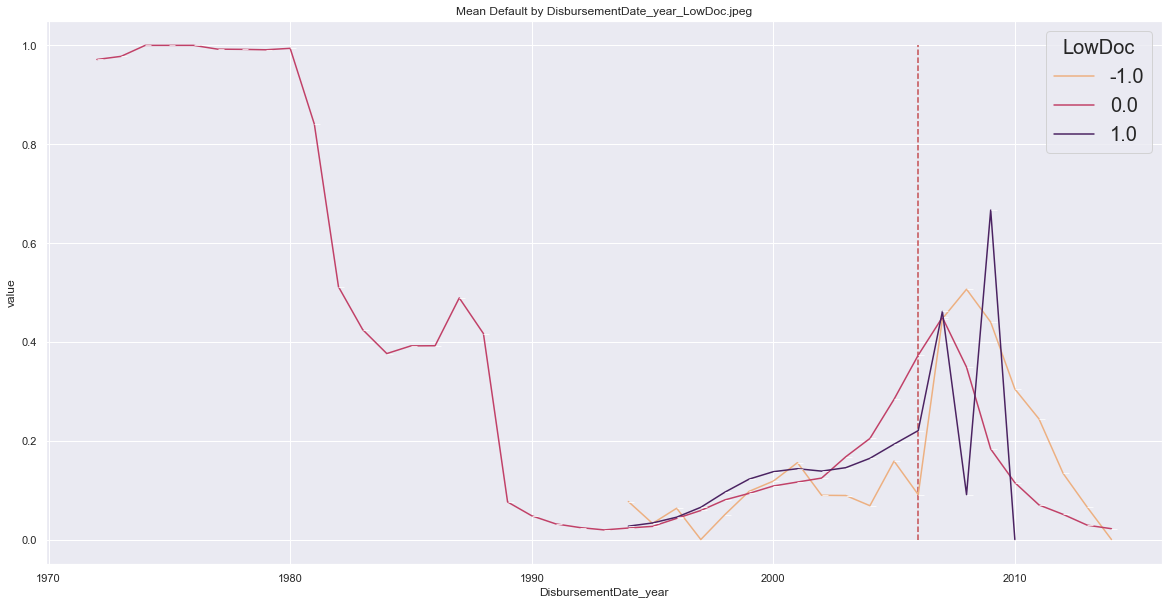

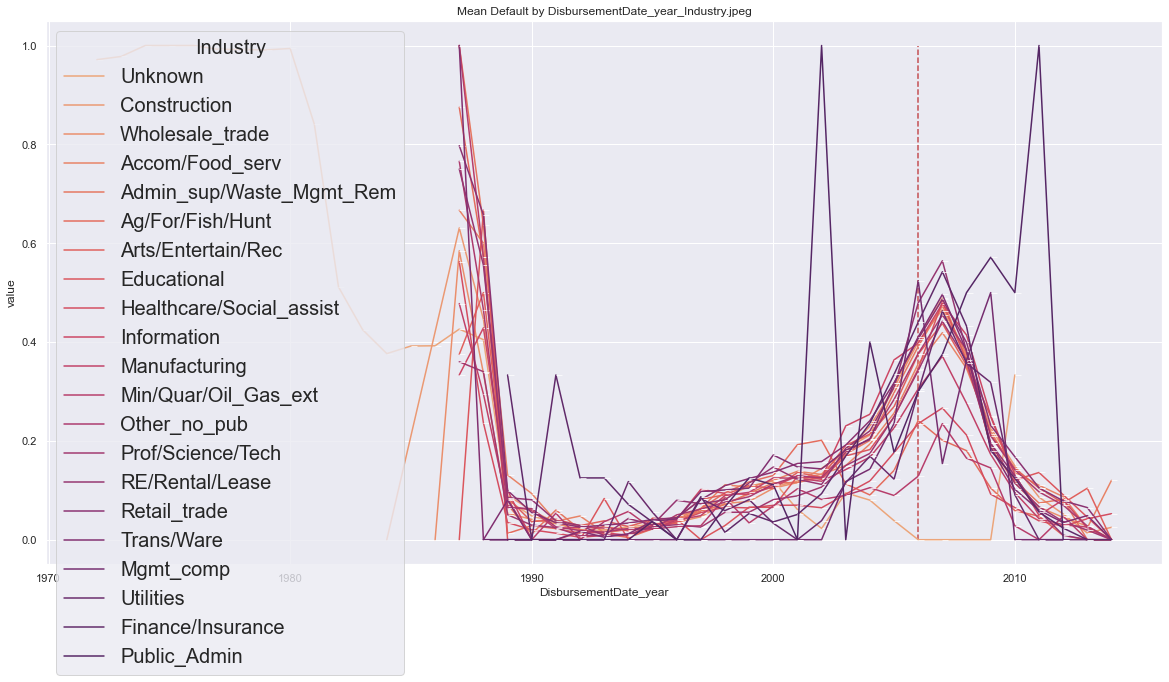

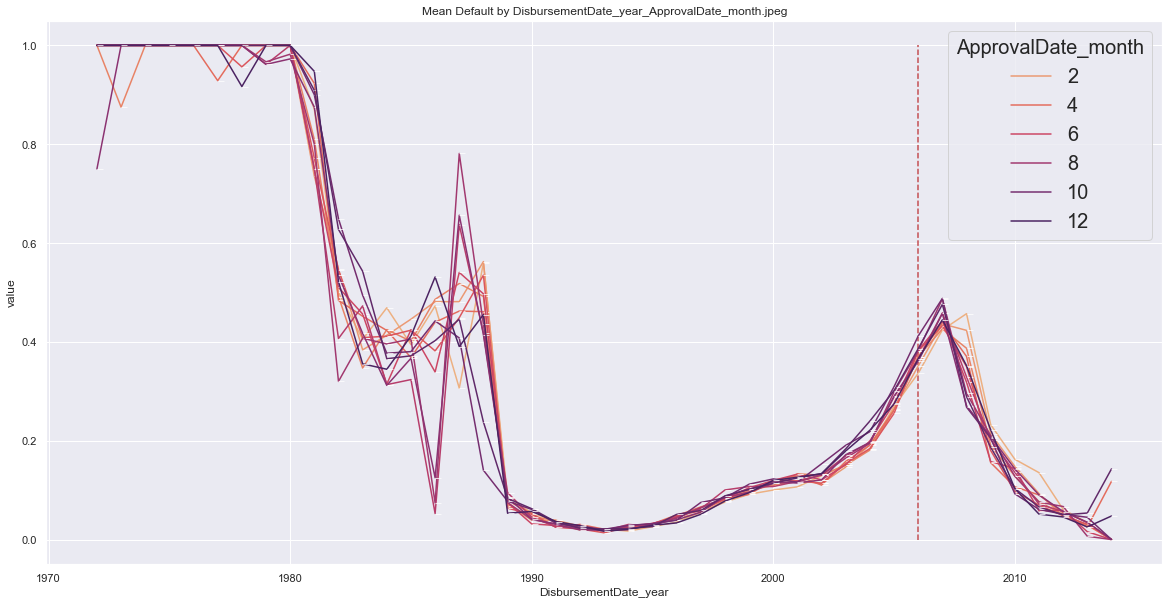

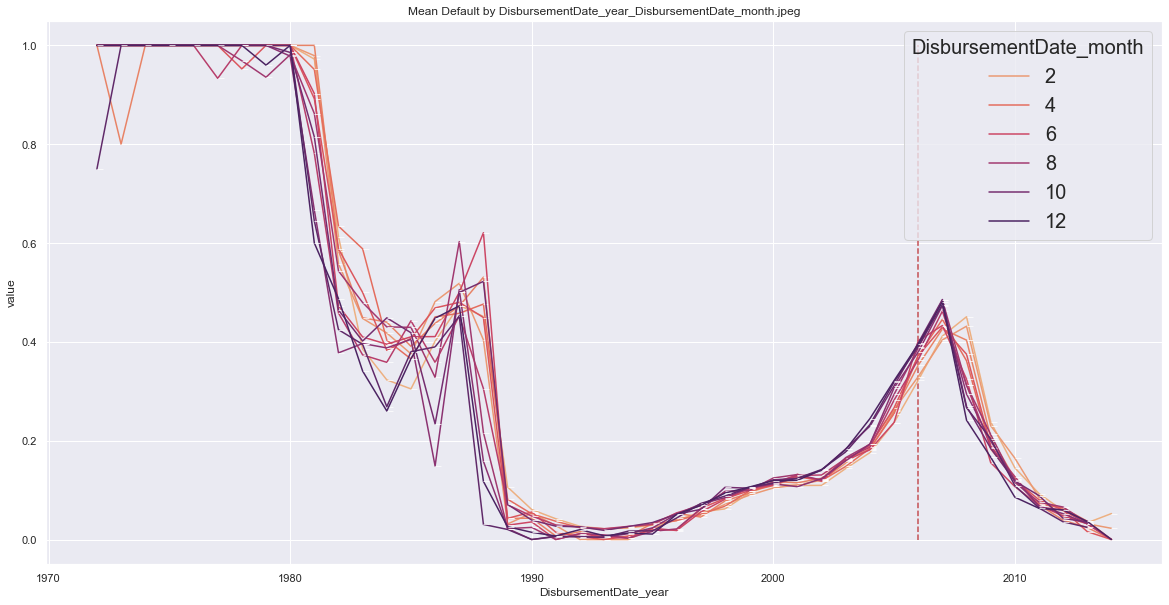

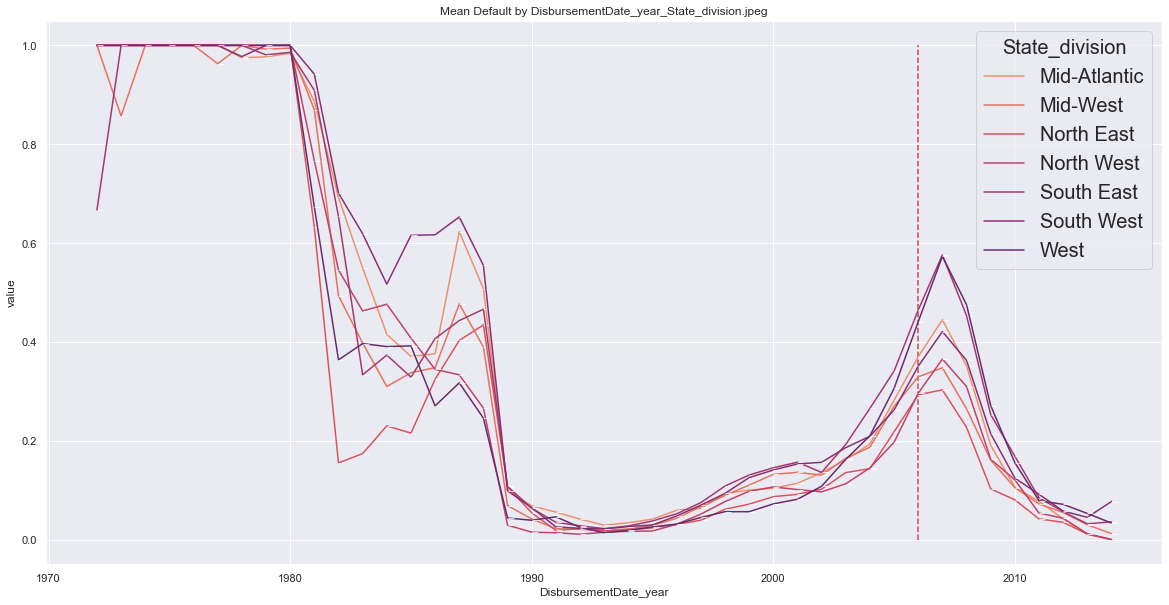

In [7]:
mean_default_hue_disbursementyear(df_copy, hue_cols=obj_features, year_col='DisbursementDate_year')

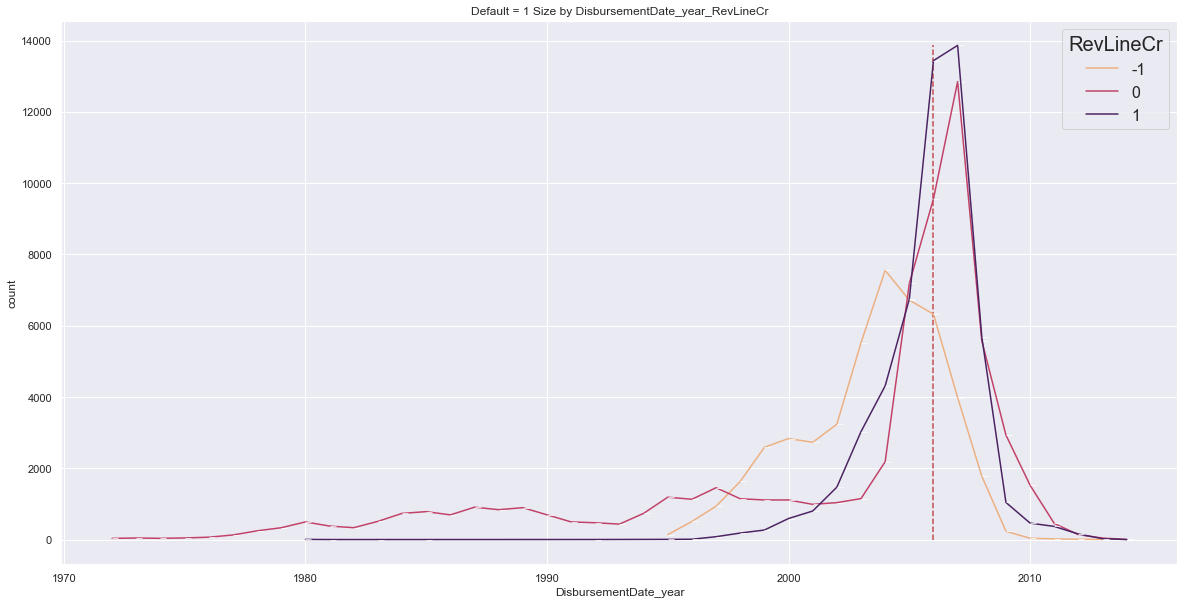

In [14]:
# RevLineCr延伸分析
dfd1 = df_copy[df_copy['Default'] == 1]

data = dfd1.groupby(by=['DisbursementDate_year', 'RevLineCr']).mean()
data_long = data.melt(ignore_index=False).reset_index()
data_def = data_long[data_long['variable'] == 'Default']

data_def = data_def[data_def['DisbursementDate_year'] >= 1972]
data_def[['DisbursementDate_year', 'RevLineCr']] = data_def[['DisbursementDate_year', 'RevLineCr']].applymap(lambda x: int(x))

year_list = list(df_groupby_mean['ApprovalDate_year'][~(df_copy.groupby(by='ApprovalDate_year').size().values < 30)].index)

data = pd.DataFrame(dfd1.groupby(by=['DisbursementDate_year', 'RevLineCr']).size()).reset_index()
data.rename(columns={0: 'count'}, inplace=True)
data = data[data['DisbursementDate_year'] >= 1972]
data[['DisbursementDate_year', 'RevLineCr']] = data[['DisbursementDate_year', 'RevLineCr']].applymap(lambda x: int(x))

plt.figure(figsize=(20,10))
plt.title('Default = 1 Size by DisbursementDate_year_RevLineCr'.format(num))
plt.grid(True)
plt.vlines(x=[2006.0], ymin=data['count'].min(), ymax=data['count'].max(), color='r', linestyles='dashed')
sns.lineplot(data=data, x=data['DisbursementDate_year'], y=data['count'], marker=True, hue='RevLineCr',
             palette="flare")
plt.savefig('Default = 1 Size by DisbursementDate_year_RevLineCr.jpeg')
plt.legend(title='RevLineCr', fontsize=16, title_fontsize=20)

plt.show()

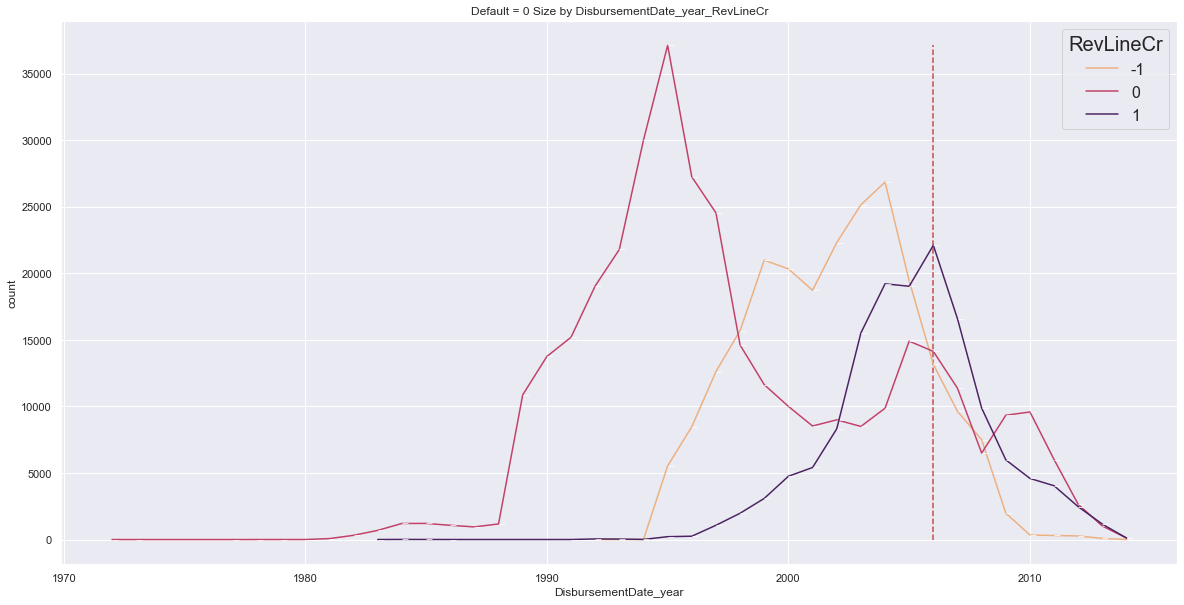

In [15]:
# RevLineCr延伸分析
dfd0 = df_copy[df_copy['Default'] == 0]

data = dfd0.groupby(by=['DisbursementDate_year', 'RevLineCr']).mean()
data_long = data.melt(ignore_index=False).reset_index()
data_def = data_long[data_long['variable'] == 'Default']

data_def = data_def[data_def['DisbursementDate_year'] >= 1972]
data_def[['DisbursementDate_year', 'RevLineCr']] = data_def[['DisbursementDate_year', 'RevLineCr']].applymap(lambda x: int(x))

year_list = list(df_groupby_mean['ApprovalDate_year'][~(df_copy.groupby(by='ApprovalDate_year').size().values < 30)].index)

data = pd.DataFrame(dfd0.groupby(by=['DisbursementDate_year', 'RevLineCr']).size()).reset_index()
data.rename(columns={0: 'count'}, inplace=True)
data = data[data['DisbursementDate_year'] >= 1972]
data[['DisbursementDate_year', 'RevLineCr']] = data[['DisbursementDate_year', 'RevLineCr']].applymap(lambda x: int(x))

plt.figure(figsize=(20,10))
plt.title('Default = 0 Size by DisbursementDate_year_RevLineCr'.format(num))
plt.grid(True)
plt.vlines(x=[2006.0], ymin=data['count'].min(), ymax=data['count'].max(), color='r', linestyles='dashed')
sns.lineplot(data=data, x=data['DisbursementDate_year'], y=data['count'], marker=True, hue='RevLineCr',
             palette="flare")
plt.savefig('Default = 0 Size by DisbursementDate_year_RevLineCr.jpeg')
plt.legend(title='RevLineCr', fontsize=16, title_fontsize=20)

plt.show()

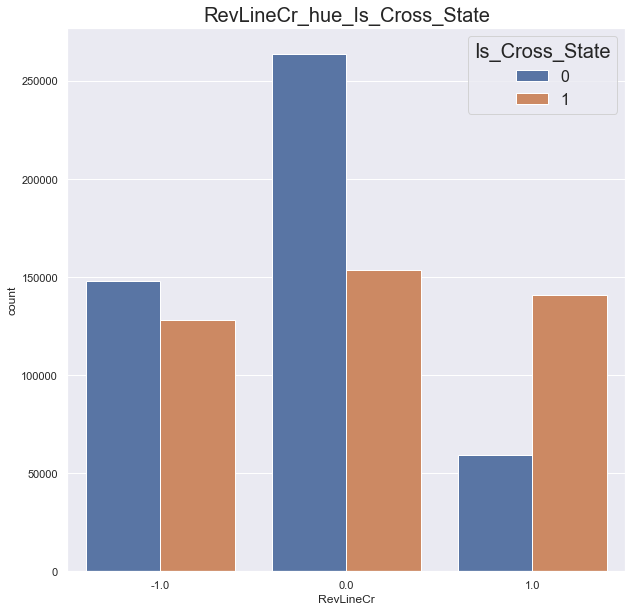

In [17]:
obj_visualization_with_hue(df_copy, obj_features=['RevLineCr'], hue_col='Is_Cross_State')

In [24]:
compare_d0d1term = pd.concat([dfd0['Term'].describe(), dfd1['Term'].describe()], axis=1)
compare_d0d1term.columns=['Default = 0', 'Default = 1']
compare_d0d1term

Default = 0    Default = 1
count  731352.000000  162855.000000
mean      122.747539      56.934316
std        79.615196      46.236645
min         0.000000       0.000000
25%        79.000000      29.000000
50%        84.000000      50.000000
75%       180.000000      69.000000
max       569.000000     461.000000

In [27]:
df_copy['DisbursementDate_month'].value_counts()

4.0     105579
10.0    101422
7.0      98060
1.0      95368
9.0      64415
3.0      63787
12.0     62956
5.0      62587
6.0      61915
8.0      60255
11.0     58970
2.0      56693
Name: DisbursementDate_month, dtype: int64

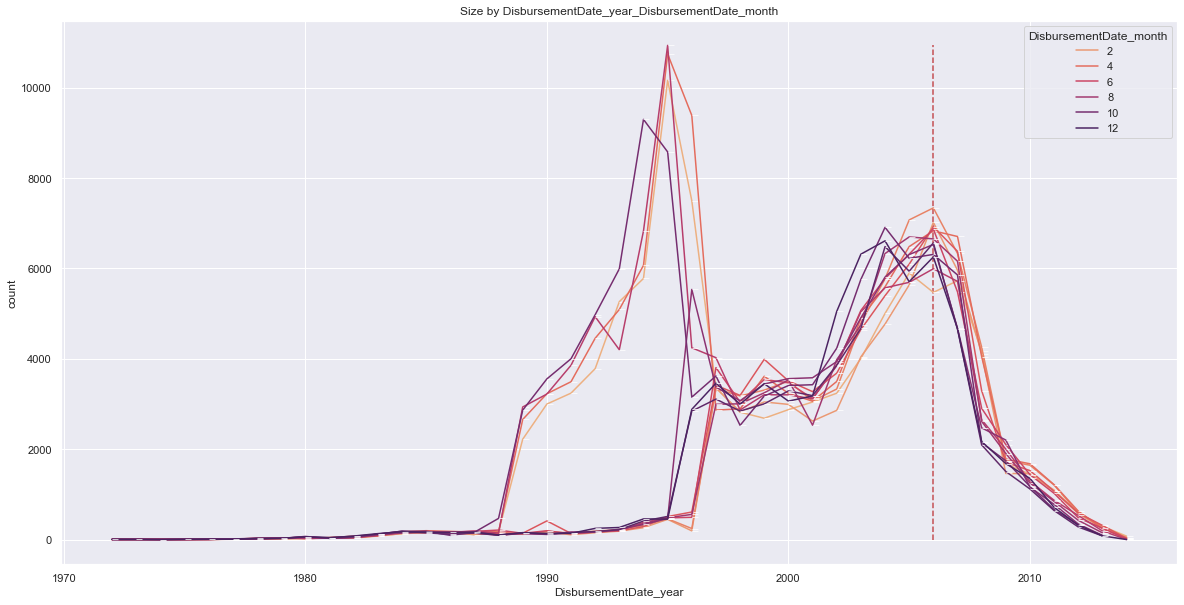

In [26]:
size_hue_disbursementyear(df_copy, hue_cols=['DisbursementDate_month'], year_col='DisbursementDate_year')

In [34]:
df_firstmon = df_copy[(df_copy['DisbursementDate_month'] == 1) | (df_copy['DisbursementDate_month'] == 4) | (df_copy['DisbursementDate_month'] == 7) | (df_copy['DisbursementDate_month'] == 10)]
df_notfirstmon = df_copy[~((df_copy['DisbursementDate_month'] == 1) | (df_copy['DisbursementDate_month'] == 4) | (df_copy['DisbursementDate_month'] == 7) | (df_copy['DisbursementDate_month'] == 10))]
df_copy.loc[list(df_notfirstmon.index), 'Mon_Is_14710'] = 0
df_copy.loc[list(df_firstmon.index), 'Mon_Is_14710'] = 1

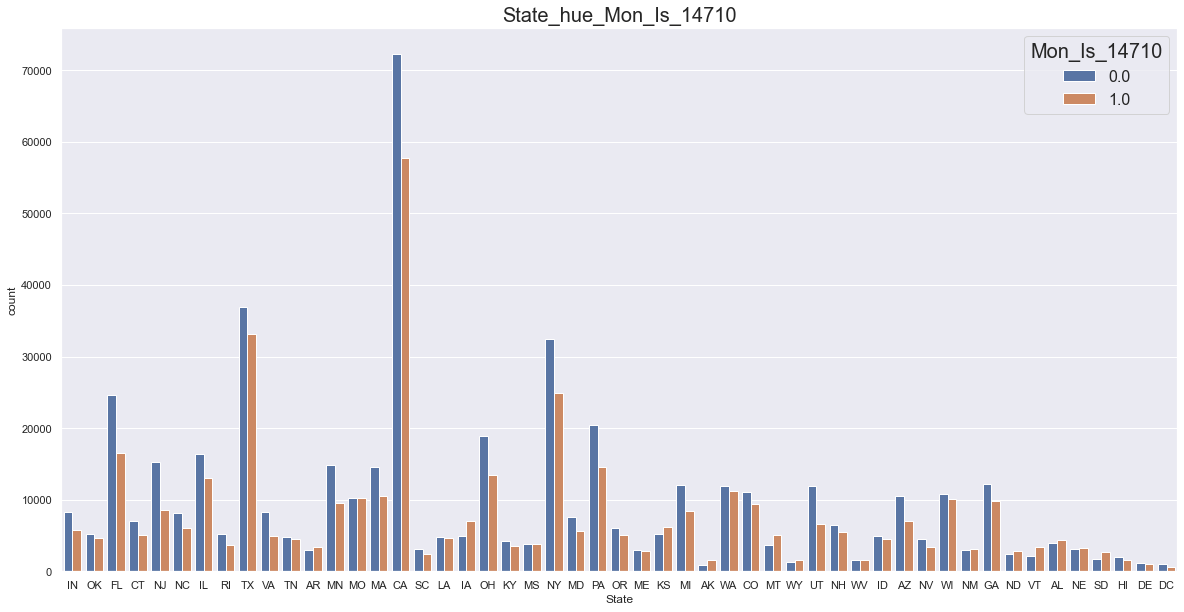

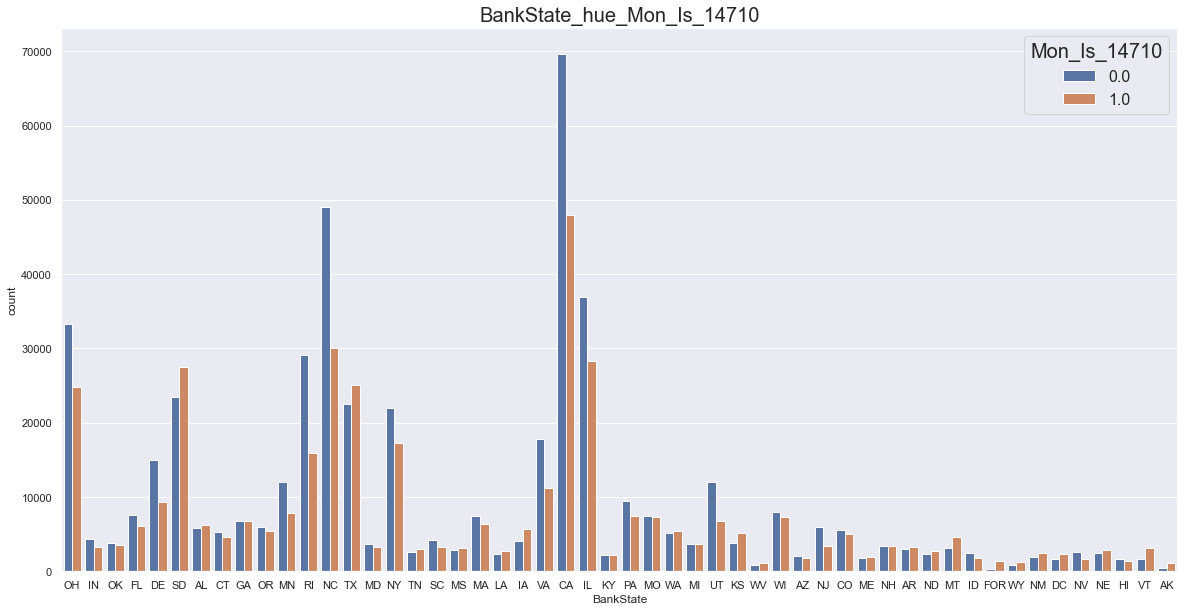

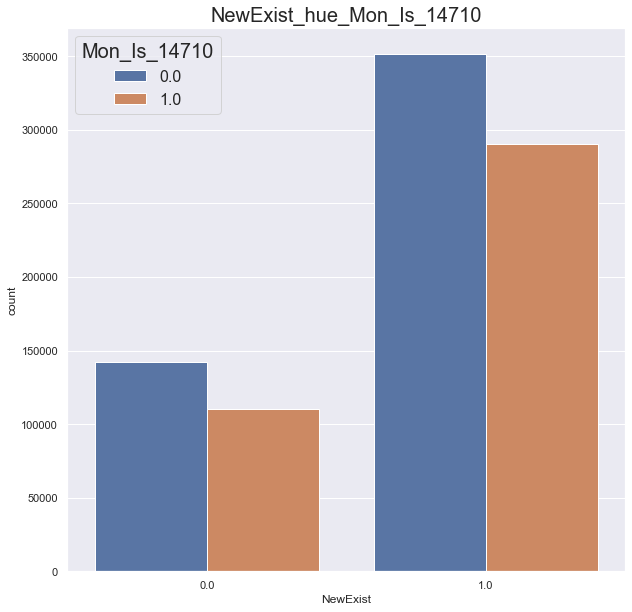

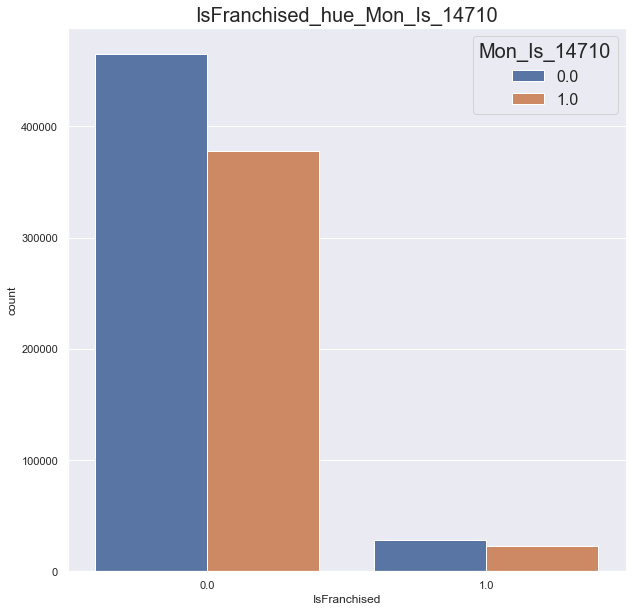

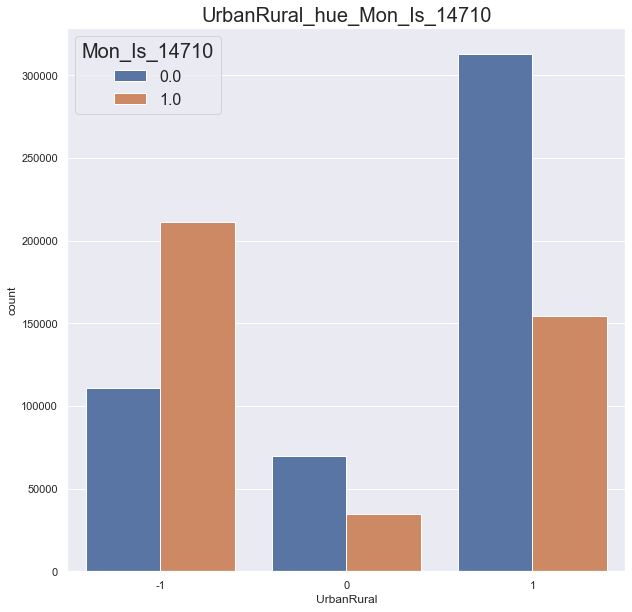

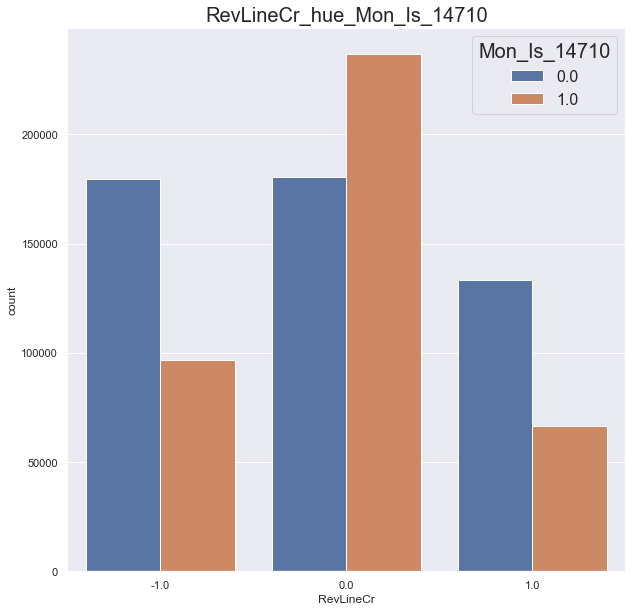

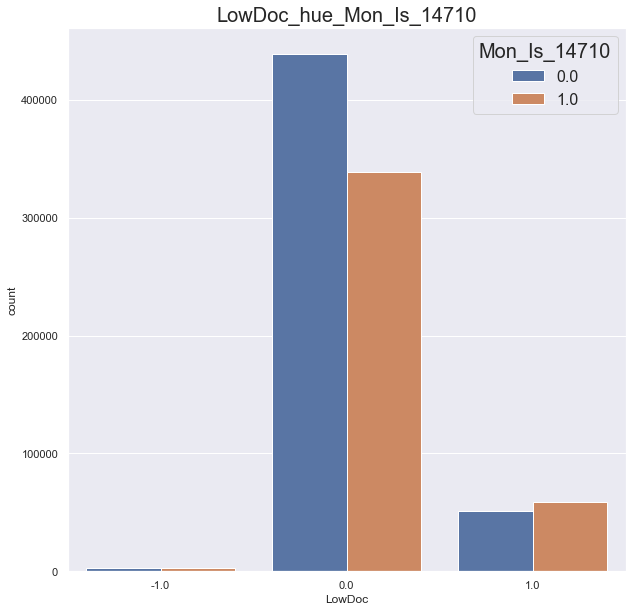

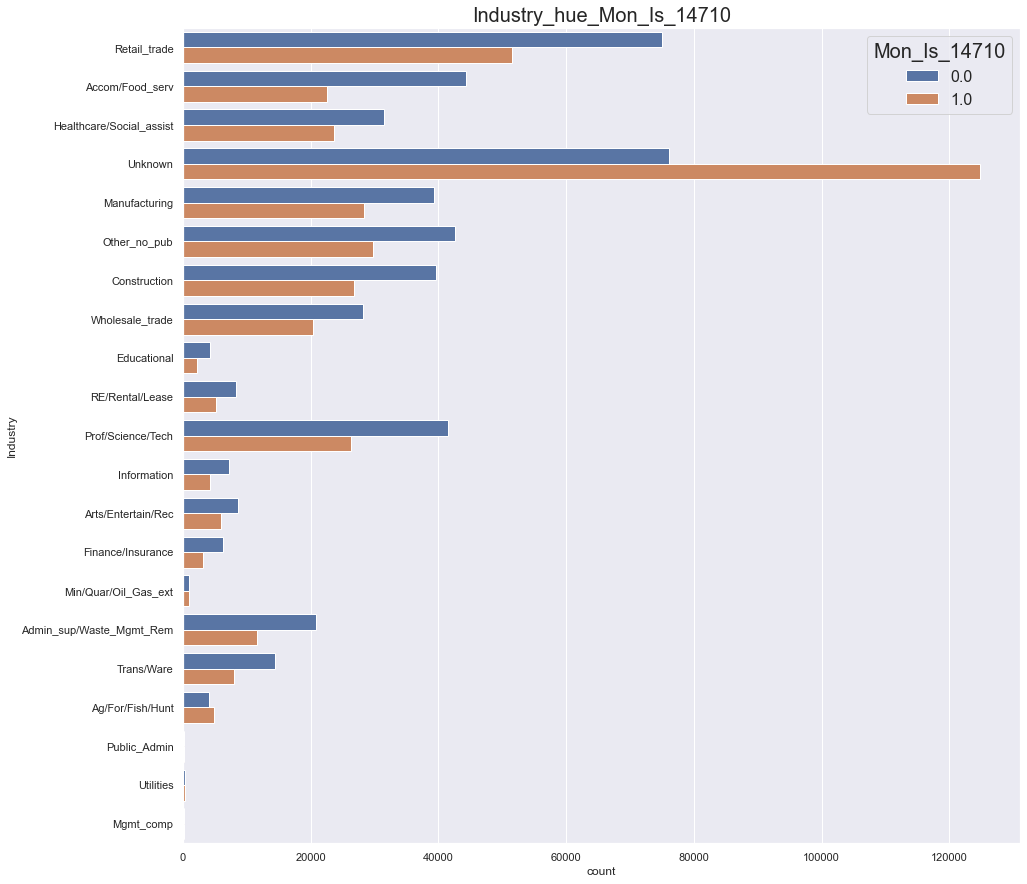

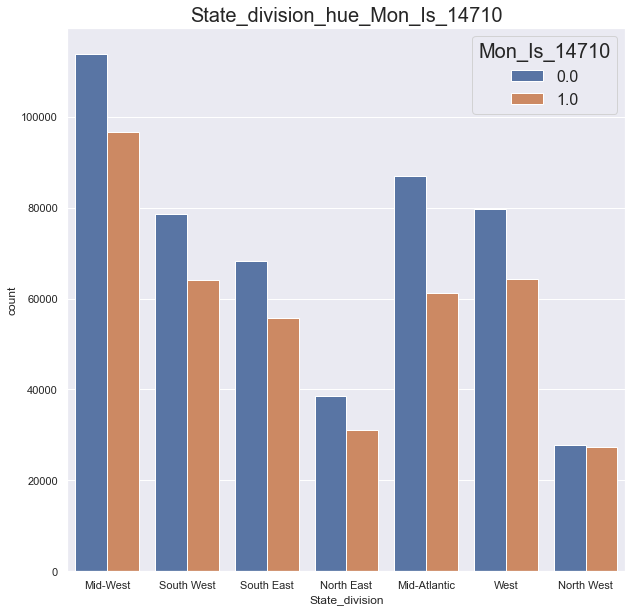

In [36]:
obj_visualization_with_hue(df_copy, obj_features, hue_col='Mon_Is_14710')

In [40]:
%run function.ipynb

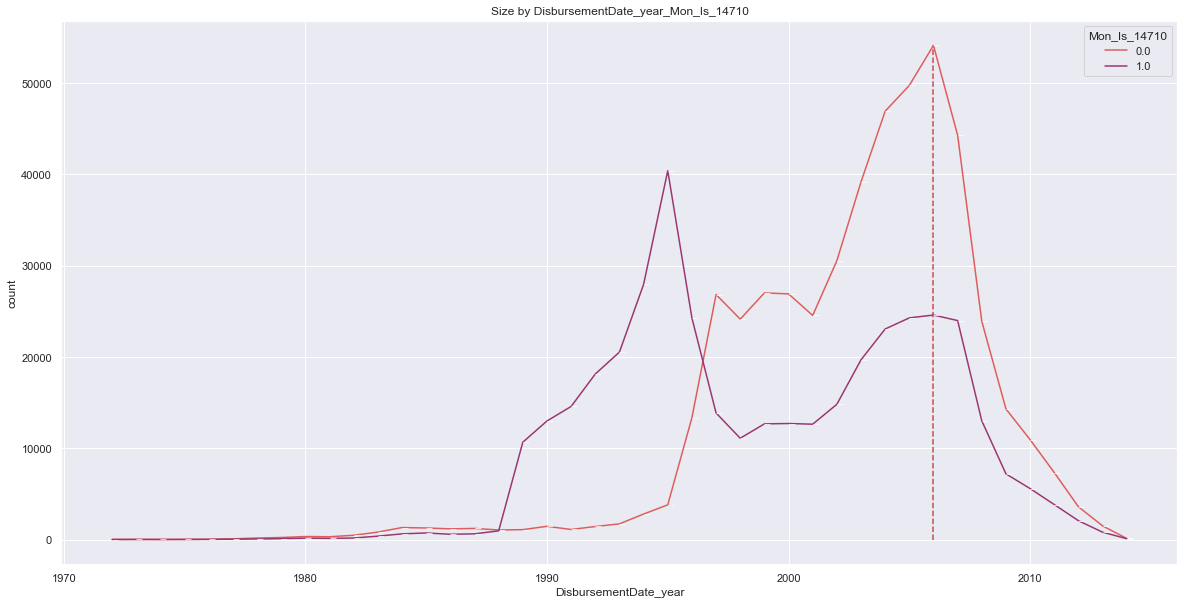

In [43]:
size_hue_disbursementyear(df_copy, hue_cols=['Mon_Is_14710'], year_col='DisbursementDate_year')

Default  Mon_Is_14710
0      0.0           0.0
1      0.0           0.0
2      0.0           0.0

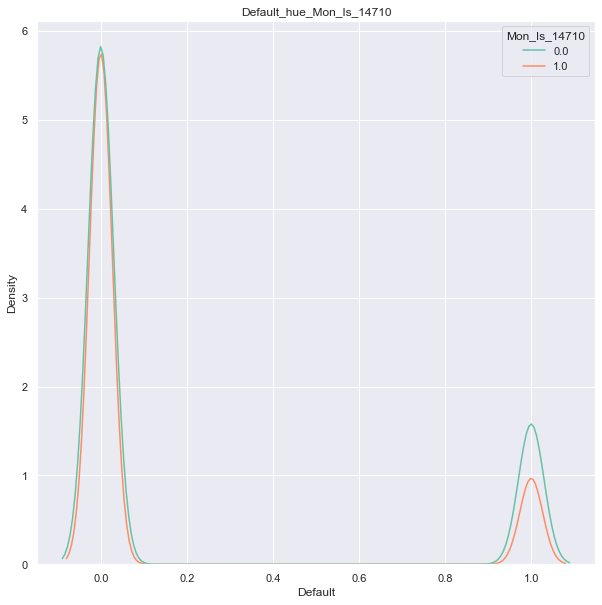

ChgOffPrinGr  Mon_Is_14710
6   378606.247444           1.0
36   18830.104233           0.0
43   88830.232921           1.0

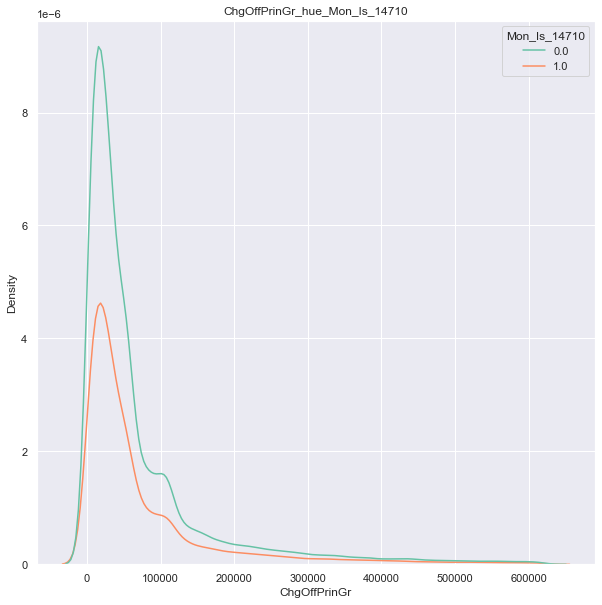

Term  Mon_Is_14710
0   84.0           0.0
1   60.0           0.0
2  180.0           0.0

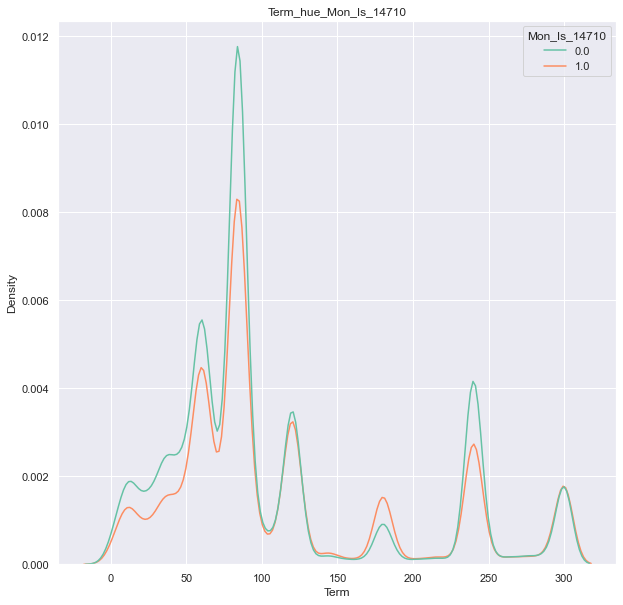

DisbursementGross  Mon_Is_14710
0       90558.780300           0.0
1       60372.520200           0.0
2      433172.832435           0.0

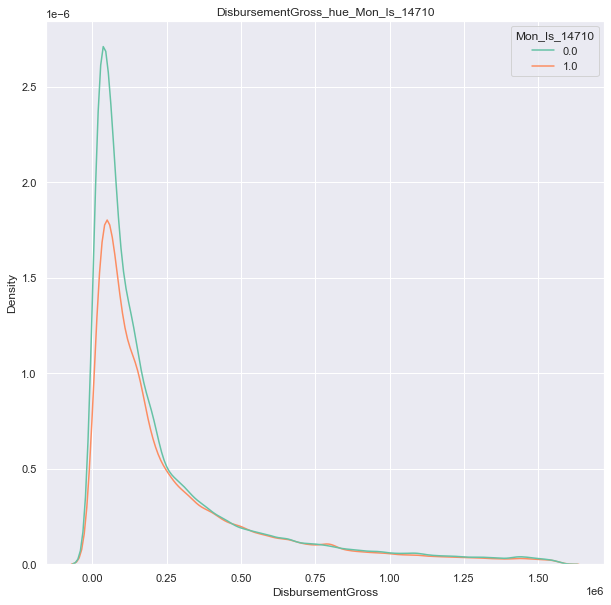

GrSBA_AppvDiff%  Mon_Is_14710
0             20.0           0.0
1             20.0           0.0
2             25.0           0.0

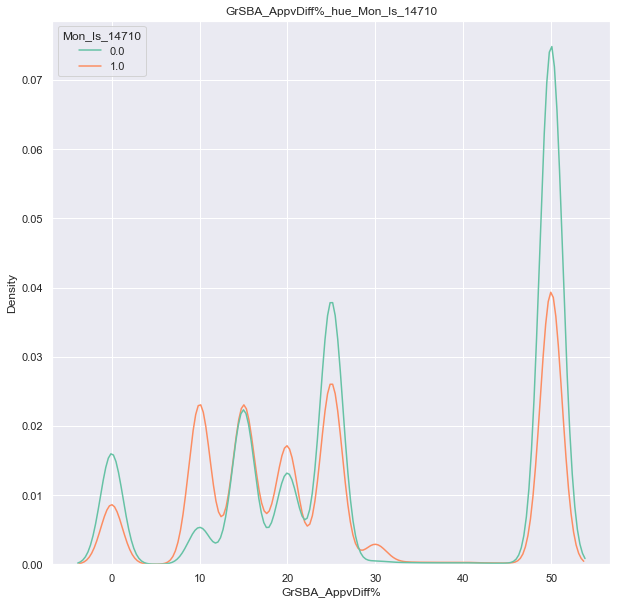

DisbursePerEmployee  Mon_Is_14710
0         12000.000000           0.0
1         13333.333333           0.0
2         35875.000000           0.0

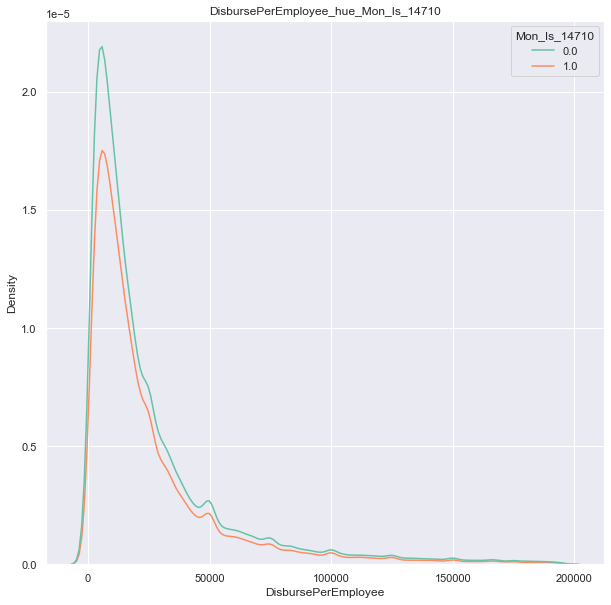

USDPerJobCreated  Mon_Is_14710
4       49376.096878           0.0
14      11319.847537           0.0
28     106321.347310           0.0

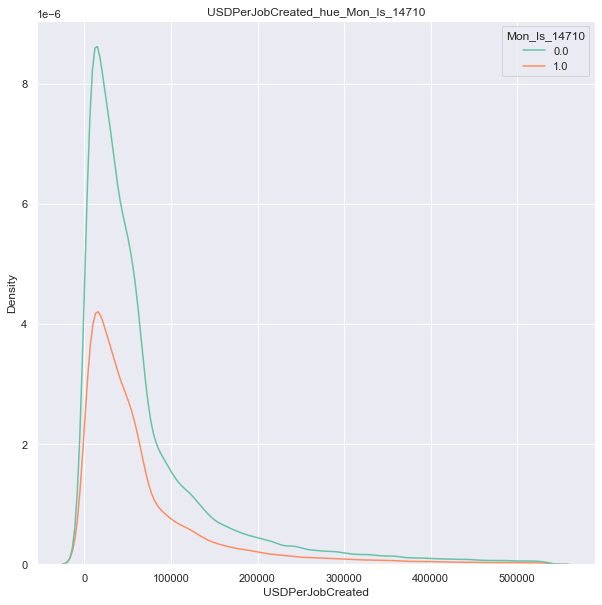

NoEmp  Mon_Is_14710
0    4.0           0.0
1    2.0           0.0
2    7.0           0.0

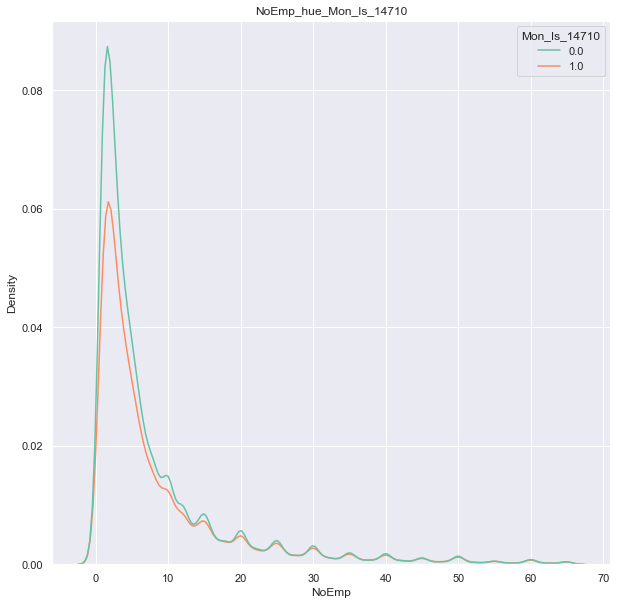

CreateJob  Mon_Is_14710
0        0.0           0.0
1        0.0           0.0
2        0.0           0.0

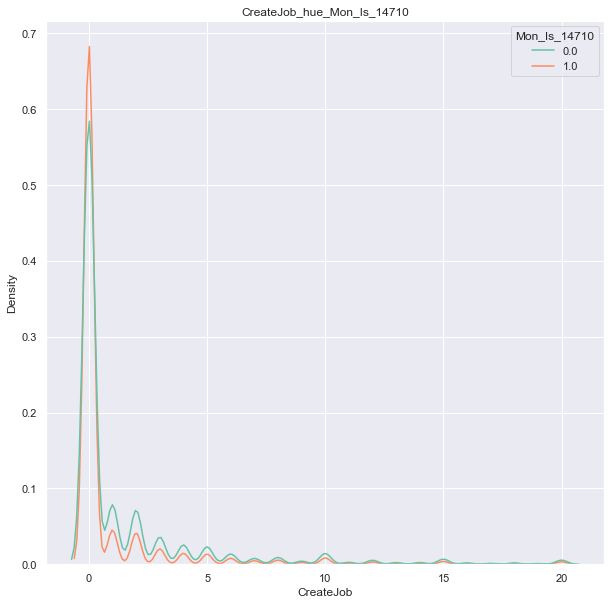

RetainedJob  Mon_Is_14710
0          0.0           0.0
1          0.0           0.0
2          0.0           0.0

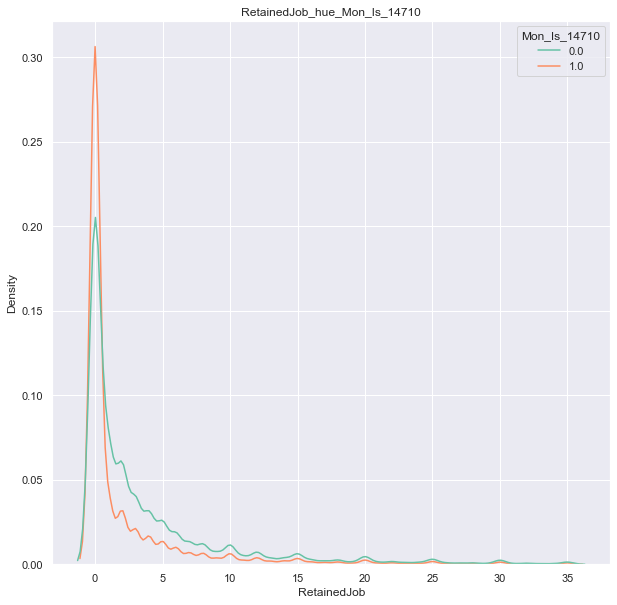

Population  Mon_Is_14710
0     31457.0           0.0
1     30671.0           0.0
2     41011.0           0.0

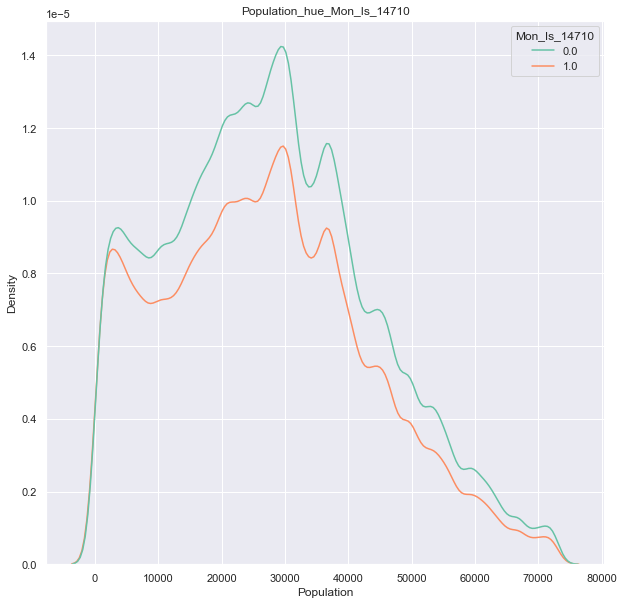

PopDensity  Mon_Is_14710
0      1939.0           0.0
1       457.0           0.0
2       495.0           0.0

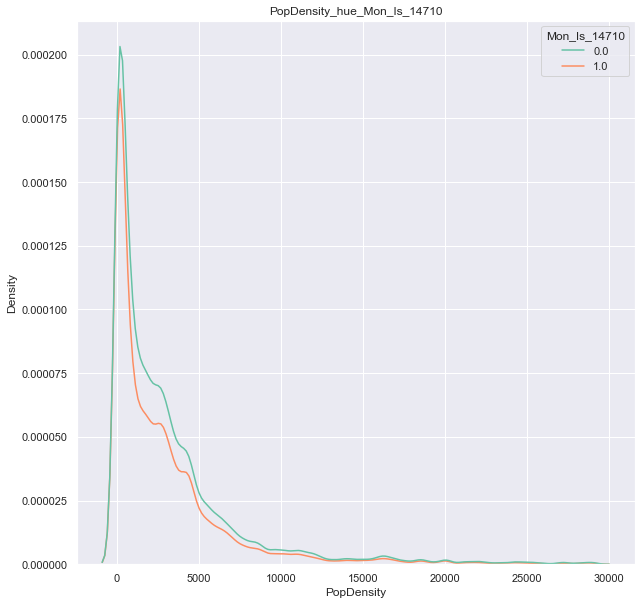

GrAppv  Mon_Is_14710
0   90558.780300           0.0
1   60372.520200           0.0
2  433172.832435           0.0

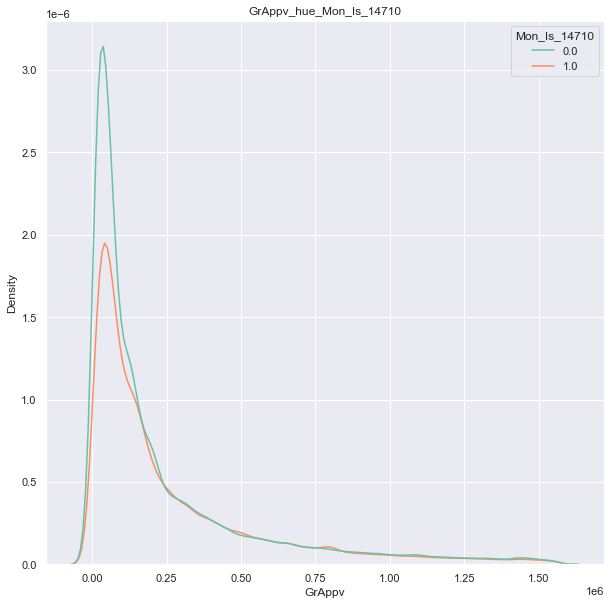

SBA_Appv  Mon_Is_14710
0   72447.024240           0.0
1   48298.016160           0.0
2  324879.624326           0.0

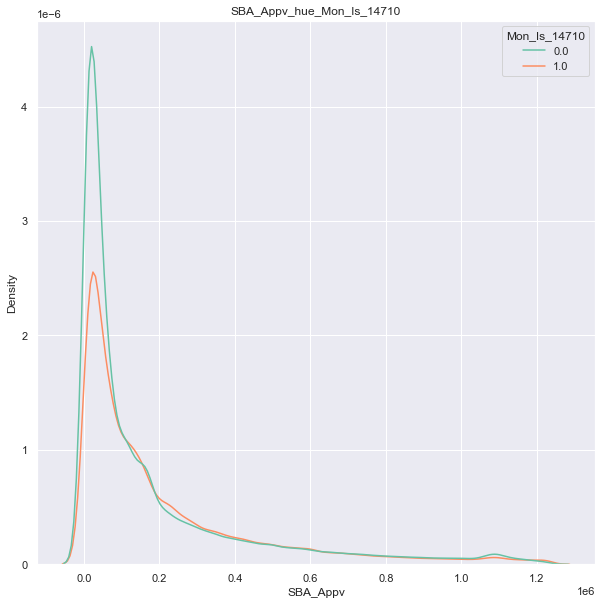

HousingUnits  Mon_Is_14710
0       14267.0           0.0
1       11847.0           0.0
2       19124.0           0.0

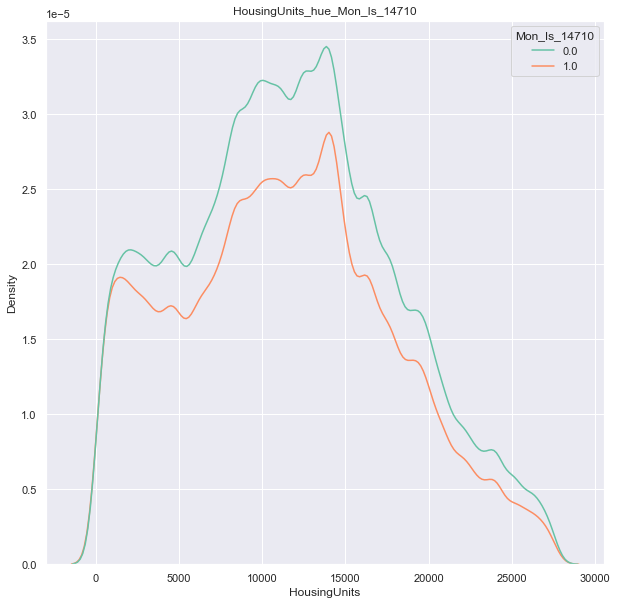

OccupiedHousingUnits  Mon_Is_14710
0               12895.0           0.0
1               10938.0           0.0
2               17562.0           0.0

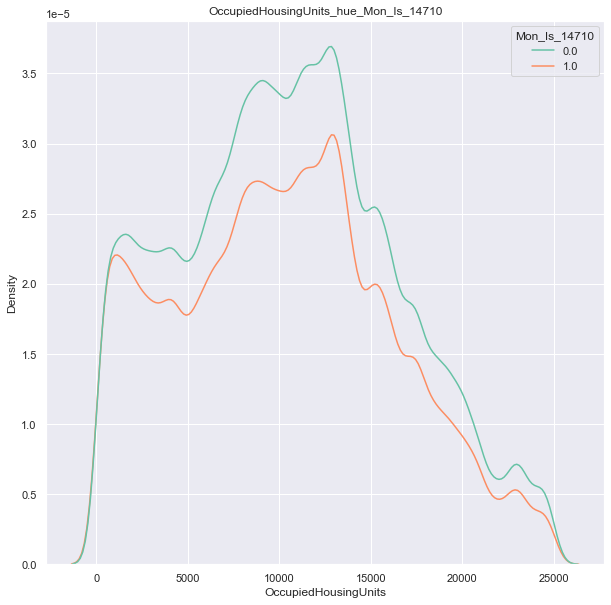

MedianHomeValue  Mon_Is_14710
0         115600.0           0.0
1         120200.0           0.0
2         207900.0           0.0

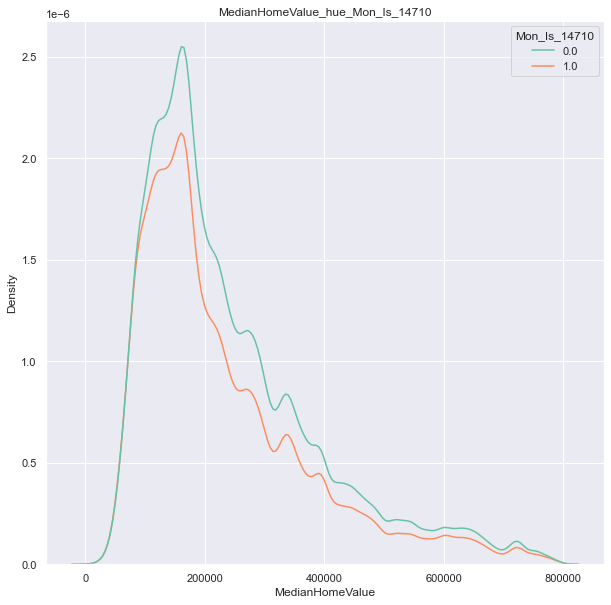

MedianHouseholdIncome  Mon_Is_14710
0                48618.0           0.0
1                47863.0           0.0
2                45415.0           0.0

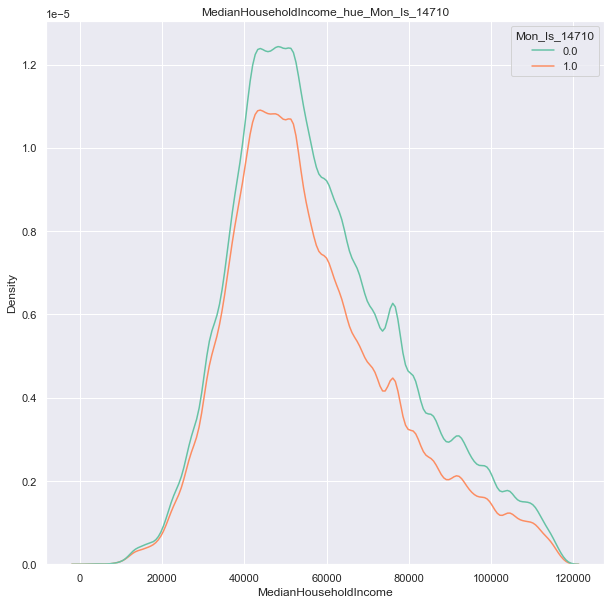

In [38]:
num_visualization_with_hue(df_copy, num_features, hue_col='Mon_Is_14710')

In [16]:
display(df_copy.iloc[:3,:23])
display(df_copy.iloc[:3,23:])

LoanNr_ChkDgt                         Name         City State    Zip  \
0     1000014003               ABC HOBBYCRAFT   EVANSVILLE    IN  47711   
1     1000024006  LANDMARK BAR & GRILLE (THE)    NEW PARIS    IN  46526   
2     1000034009        WHITLOCK DDS, TODD M.  BLOOMINGTON    IN  47401   

                      Bank BankState ApprovalDate   Term  NoEmp  ...  \
0         FIFTH THIRD BANK        OH   1997-02-28   84.0    4.0  ...   
1          1ST SOURCE BANK        IN   1997-02-28   60.0    2.0  ...   
2  GRANT COUNTY STATE BANK        IN   1997-02-28  180.0    7.0  ...   

   IsFranchised  UrbanRural  RevLineCr  LowDoc  ChgOffDate  DisbursementDate  \
0           0.0          -1        0.0     1.0         NaN        1999-02-28   
1           0.0          -1        0.0     1.0         NaN        1997-05-31   
2           0.0          -1        0.0     0.0         NaN        1997-12-31   

   DisbursementGross BalanceGross Default  ChgOffPrinGr  
0       90558.780300          0.0     0.0           NaN  
1       60372.520200          0.0     0.0           NaN  
2      433172.832435          0.0     0.0           NaN  

[3 rows x 23 columns]

GrAppv       SBA_Appv                  Industry  ChgOffDate_year  \
0   90558.780300   72447.024240              Retail_trade              NaN   
1   60372.520200   48298.016160           Accom/Food_serv              NaN   
2  433172.832435  324879.624326  Healthcare/Social_assist              NaN   

   ChgOffDate_month  ChgOffDate_day  DisbursementDate_year  \
0               NaN             NaN                 1999.0   
1               NaN             NaN                 1997.0   
2               NaN             NaN                 1997.0   

   DisbursementDate_month  DisbursementDate_day  ApprovalDate_year  ...  \
0                     2.0                  28.0             1997.0  ...   
1                     5.0                  31.0             1997.0  ...   
2                    12.0                  31.0             1997.0  ...   

   OccupiedHousingUnits  MedianHomeValue  MedianHouseholdIncome  \
0               12895.0         115600.0                48618.0   
1               10938.0         120200.0                47863.0   
2               17562.0         207900.0                45415.0   

   DisbursePerEmployee  GrSBA_AppvDiff%  State_division  USDPerJobCreated  \
0         12000.000000             20.0        Mid-West               NaN   
1         13333.333333             20.0        Mid-West               NaN   
2         35875.000000             25.0        Mid-West               NaN   

   loan_marturity_date  Is_Cross_State  Appv_Dusburse_delta  
0           2004-02-28               1                730.0  
1           2002-02-28               0                 92.0  
2           2012-02-28               0                306.0  

[3 rows x 25 columns]